# P4

## Récupération et visualisation des données

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Quelques options d'affichage
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) 
plt.style.use('default')

# Méthode de suppression de colonne
def DropCol(p_df, p_col):
    if p_col in p_df.columns:
        p_df = p_df.drop([p_col], axis=1)
    return p_df

# Récupération du fichier en local
CT_DIR_DATA = 'C:\Work\OpenClassrooms\data\P4/'
filename = '2016_01'
dataraw = pd.read_csv(CT_DIR_DATA + filename + '.csv', error_bad_lines=False)
dataraw.shape

(445827, 65)

In [2]:
import pickle
import os

def save_obj(obj, name):
    fn = '../flightdelay/save/'+ name + '.pkl'
    try:
        os.remove(fn)
    except OSError:
        pass
    with open(fn, 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    print(fn, 'saved')


In [3]:
# A faire une seule fois : récupération de tous les aéroports
if False:
    tmp = pd.read_csv(CT_DIR_DATA + '2016_01.csv', error_bad_lines=False)
    # Concaténation de toutes les données
    for i in range(2, 13):
        n = CT_DIR_DATA + '2016_%0*d.csv' % (2, i)
        print(n)
        tmp = tmp.append(pd.read_csv(n, error_bad_lines=False))

    tmp = (tmp[['ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME']].drop_duplicates()).sort_values(['ORIGIN_CITY_NAME'])
    
    # Petit nettoyage
    tmp = tmp[tmp.ORIGIN_AIRPORT_ID != 'GA']
    tmp = tmp[tmp.ORIGIN_AIRPORT_ID != 15]
    tmp.ORIGIN_AIRPORT_ID = tmp.ORIGIN_AIRPORT_ID.astype(np.int)
    tmp = tmp.drop_duplicates()

    save_obj(tmp, 'model_airport')

In [4]:
dataraw.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,445827.0,445827.0,445827.0,445827.000000,445827.000000,445827.000000,445827.000000,445827.000000,4.458270e+05,445827.000000,445827.000000,445827.00000,445827.000000,4.458270e+05,445827.000000,445827.000000,445827.000000,445827.000000,434354.000000,434354.000000,434354.000000,434354.000000,434354.000000,434227.000000,434227.000000,433920.000000,433920.000000,445827.000000,433920.000000,433298.000000,433298.000000,433298.000000,433298.000000,445827.000000,445827.000000,445827.000000,433298.000000,433298.000000,445827.0,445827.000000,445827.000000,70882.000000,70882.000000,70882.000000,70882.000000,70882.000000,2552.000000,2552.000000,2552.000000,0.0
mean,2016.0,1.0,1.0,15.893510,4.113815,19903.085069,2078.856456,12682.120789,1.268215e+06,31723.938281,25.724613,55.65243,12681.700924,1.268173e+06,31723.664890,25.729274,55.652870,1330.384387,1334.236268,7.793537,10.774681,0.163585,-0.076233,16.449422,1356.554065,1483.300601,7.294298,1502.951591,1488.101445,1.533654,10.556042,0.163587,-0.376575,0.026165,0.001938,146.499142,140.135200,116.395818,1.0,844.233880,3.848746,20.921912,2.836573,12.680455,0.080415,21.635450,1236.022335,32.054075,31.776254,NaN
std,0.0,0.0,0.0,8.936692,2.005007,382.853084,1757.269780,1529.485604,1.529483e+05,1280.460591,16.752301,26.95134,1529.329960,1.529327e+05,1280.213952,16.751373,26.949279,482.809711,492.955466,36.833007,35.780277,0.369899,1.945120,9.169353,493.866371,514.352310,5.437682,505.240190,518.681533,39.096842,35.235580,0.369901,2.074161,0.159626,0.043980,76.606607,74.753951,72.981191,0.0,610.349957,2.396397,57.041917,23.306995,24.859425,2.070844,41.991917,513.040425,25.993098,25.698255,NaN
min,2016.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,1.000000,1.00000,10135.000000,1.013503e+06,30070.000000,1.000000,1.000000,1.000000,1.000000,-47.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-79.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,21.000000,15.000000,8.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,NaN
25%,2016.0,1.0,1.0,8.000000,2.000000,19790.000000,702.000000,11292.000000,1.129202e+06,30615.000000,12.000000,34.00000,11292.000000,1.129202e+06,30615.000000,12.000000,34.000000,920.000000,924.000000,-5.000000,0.000000,0.000000,-1.000000,11.000000,939.000000,1104.000000,4.000000,1118.000000,1108.000000,-15.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,90.000000,85.000000,62.000000,1.0,391.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,805.000000,15.000000,15.000000,NaN
50%,2016.0,1.0,1.0,16.000000,4.000000,19805.000000,1594.000000,12889.000000,1.288903e+06,31453.000000,24.000000,52.00000,12889.000000,1.288903e+06,31453.000000,24.000000,52.000000,1325.000000,1331.000000,-2.000000,0.000000,0.000000,-1.000000,14.000000,1344.000000,1519.000000,6.000000,1527.000000,1522.000000,-7.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,128.000000,122.000000,98.000000,1.0,679.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1149.000000,25.000000,25.000000,NaN
75%,2016.0,1.0,1.0,24.000000,6.000000,20304.000000,2763.000000,14027.000000,1.402702e+06,32467.000000,40.000000,82.00000,14027.000000,1.402702e+06,32467.000000,40.000000,82.000000,1730.000000,1737.000000,5.000000,5.000000,0.000000,0

In [5]:
dataraw.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


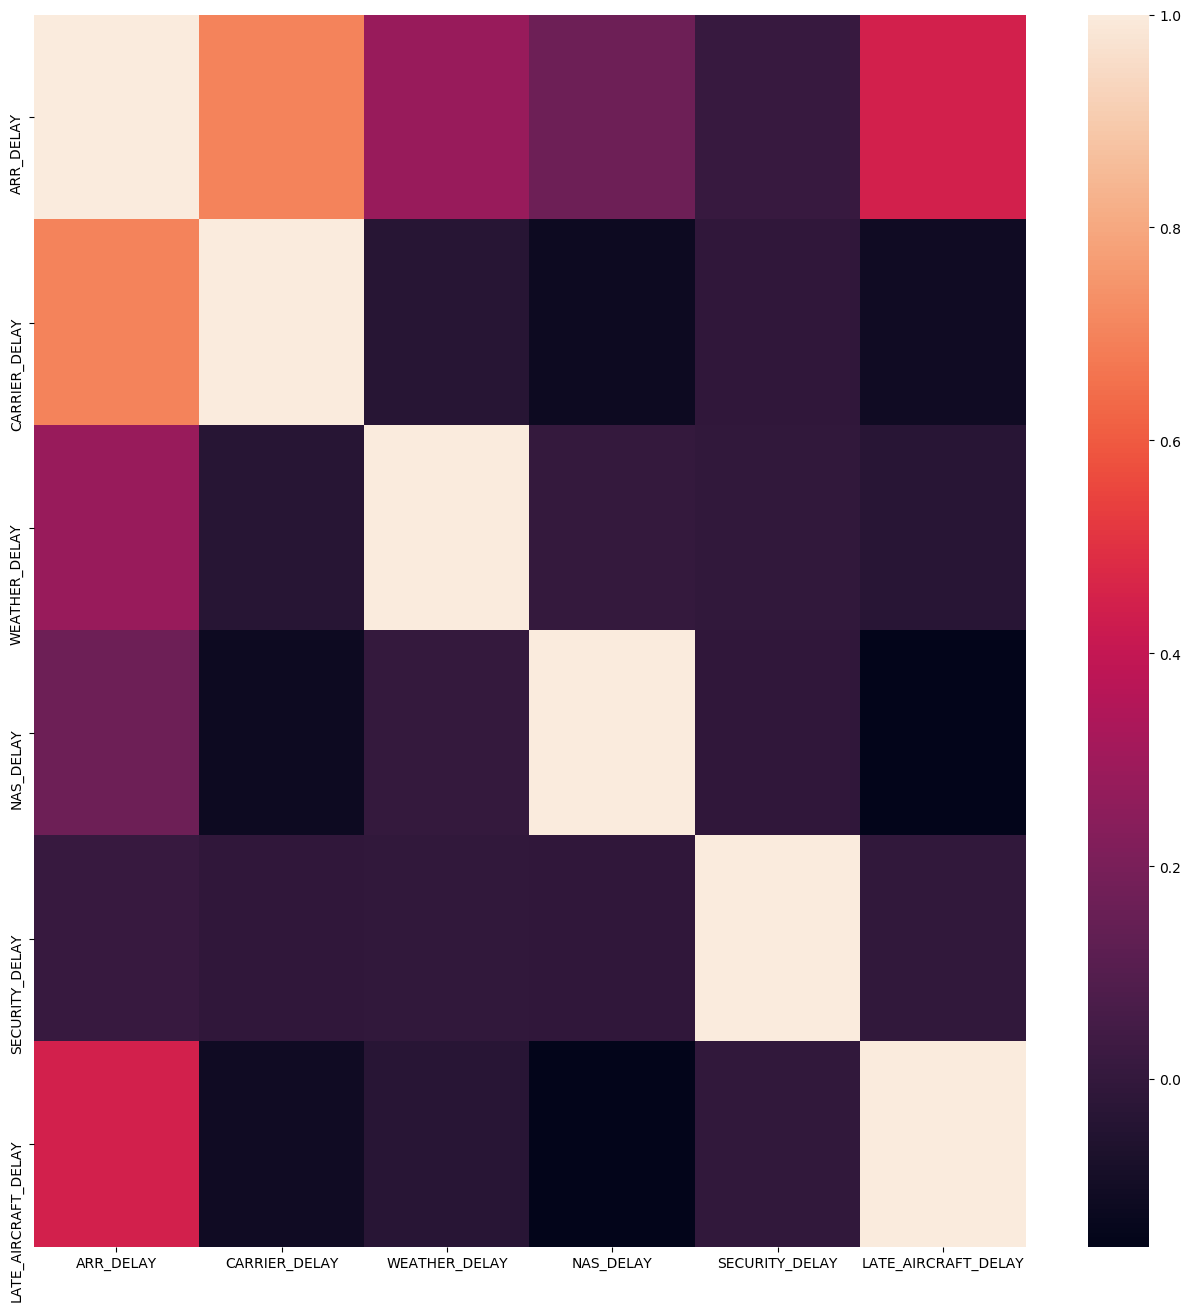

In [82]:
cols = ['ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
#Correlation Heat Map
plt.figure(figsize=(16, 16))
sns.heatmap(dataraw[cols].corr())
plt.show()

In [83]:
# On ne s'occupe pas de certains vols
print(dataraw.CANCELLED.sum(), 'vols annulés')
print(dataraw.DIVERTED.sum(), 'vols détournés')
dataraw = dataraw[dataraw.DIVERTED==0]
dataraw = dataraw[dataraw.CANCELLED==0]
print('Il reste', dataraw.ARR_DELAY.isnull().sum(), 'valeur manquante pour DELAY')

11665.0 vols annulés
864.0 vols détournés
Il reste 0 valeur manquante pour DELAY


Il n'y en a pas beaucoup proportionnellement, on peut s'en débarrasser. Ou alors il n'y en a déjà plus (vols annulés ou détournés)

In [84]:
# Comme Jesse !
cols = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 
        'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']
# Mais mieux :
# On garde ORIGIN_CITY_NAME pour la page web
cols = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'CRS_DEP_TIME', 'ARR_DELAY']
dataraw = dataraw[cols]

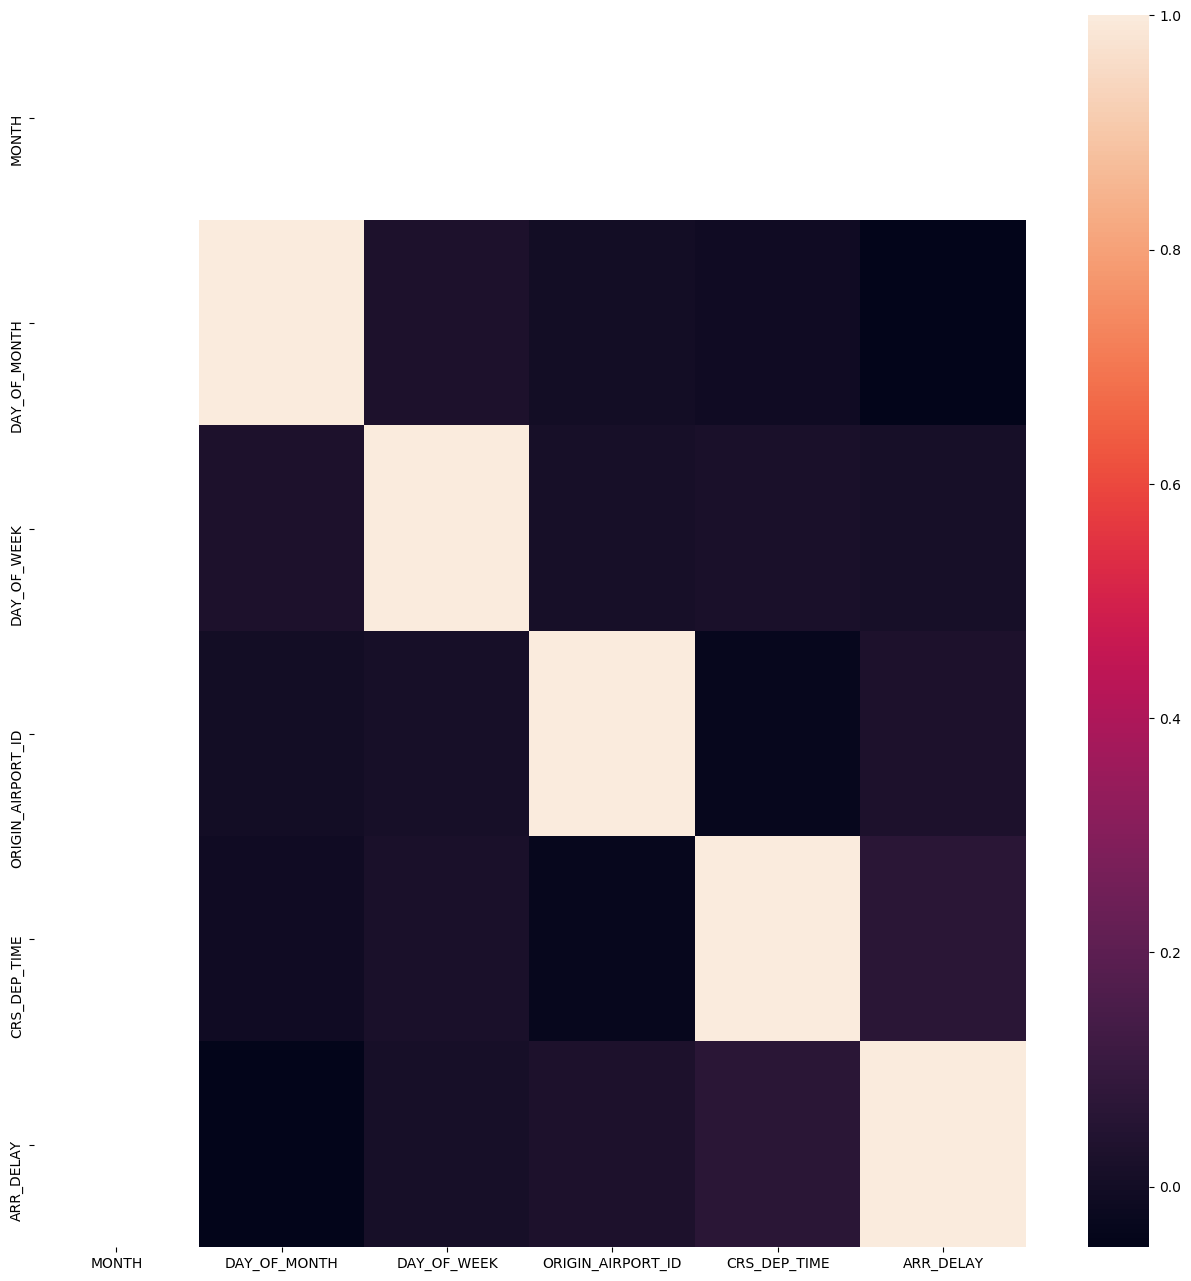

In [85]:
#Correlation Heat Map
plt.figure(figsize=(16, 16))
sns.heatmap(dataraw.corr())
plt.show()

In [86]:
dataraw.corr()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,CRS_DEP_TIME,ARR_DELAY
MONTH,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,1.000000,0.030139,0.000470,-0.008330,-0.051808
DAY_OF_WEEK,NaN,0.030139,1.000000,0.010927,0.019423,0.013652
ORIGIN_AIRPORT_ID,NaN,0.000470,0.010927,1.000000,-0.034424,0.027181
CRS_DEP_TIME,NaN,-0.008330,0.019423,-0.034424,1.000000,0.064627
ARR_DELAY,NaN,-0.051808,0.013652,0.027181,0.064627,1.000000


In [87]:
dataraw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433298 entries, 0 to 445826
Data columns (total 8 columns):
MONTH                433298 non-null int64
DAY_OF_MONTH         433298 non-null int64
DAY_OF_WEEK          433298 non-null int64
UNIQUE_CARRIER       433298 non-null object
ORIGIN_AIRPORT_ID    433298 non-null int64
ORIGIN_CITY_NAME     433298 non-null object
CRS_DEP_TIME         433298 non-null int64
ARR_DELAY            433298 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 29.8+ MB


In [88]:
dataraw.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,CRS_DEP_TIME,ARR_DELAY
0,1,6,3,AA,11298,"Dallas/Fort Worth, TX",1100,-6.0
1,1,7,4,AA,11298,"Dallas/Fort Worth, TX",1100,-12.0
2,1,8,5,AA,11298,"Dallas/Fort Worth, TX",1100,7.0
3,1,9,6,AA,11298,"Dallas/Fort Worth, TX",1100,-5.0
4,1,10,7,AA,11298,"Dallas/Fort Worth, TX",1100,113.0


In [89]:
# Données non numériques
df_str = dataraw.select_dtypes(exclude=[np.number])
df_str.describe()

,UNIQUE_CARRIER,ORIGIN_CITY_NAME
count,433298,433298
unique,12,290
top,WN,"Atlanta, GA"
freq,101335,29413


In [90]:
# Données numériques
df_num = dataraw.select_dtypes(include=[np.number])
df_num.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,CRS_DEP_TIME,ARR_DELAY
count,433298.0,433298.000000,433298.000000,433298.000000,433298.000000,433298.000000
mean,1.0,15.762194,4.088341,12687.277326,1330.294109,1.533654
std,0.0,8.965021,2.000964,1531.194280,482.799805,39.096842
min,1.0,1.000000,1.000000,10135.000000,1.000000,-79.000000
25%,1.0,8.000000,2.000000,11292.000000,920.000000,-15.000000
50%,1.0,15.000000,4.000000,12889.000000,1325.000000,-7.000000
75%,1.0,24.000000,6.000000,14057.000000,1730.000000,5.000000
max,1.0,31.000000,7.000000,16218.000000,2359.000000,1659.000000


## Les valeurs manquantes

In [91]:
print(dataraw.ARR_DELAY.notnull().sum())
print(dataraw.ARR_DELAY.isnull().sum())
print(dataraw.shape)
dataraw = dataraw.dropna()
print(dataraw.shape)

433298
0
(433298, 8)
(433298, 8)


Il n'y en a pas beaucoup proportionnellement, on peut s'en débarrasser. Ou alors il n'y en a déjà plus (vols annulés ou détournés)

## Les outliers

{'boxes': [<matplotlib.lines.Line2D at 0x1093d588>],
 'caps': [<matplotlib.lines.Line2D at 0x1093df98>,
 'fliers': [<matplotlib.lines.Line2D at 0x10954c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10954828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1093d6d8>,
  <matplotlib.lines.Line2D at 0x1093db70>]}

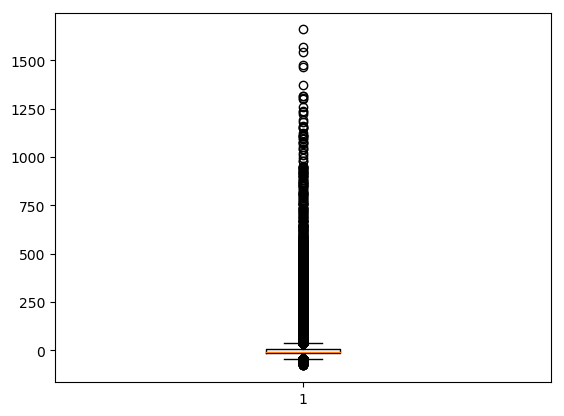

In [92]:
dataraw.ARR_DELAY.describe()
plt.boxplot(dataraw.ARR_DELAY)

## Dates et jours fériés

On va définir une distance au jour férié le plus proche

In [93]:
# Liste des jours fériés américains en  2016
holidays = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-26']
dfhol = pd.DataFrame({'date' : holidays}, columns = ['date'])
dfhol = pd.to_datetime(dfhol.date)
dfhol

0   2016-01-01
1   2016-01-18
2   2016-02-15
3   2016-05-30
4   2016-07-04
5   2016-09-05
6   2016-10-10
7   2016-11-11
8   2016-11-24
9   2016-12-26
Name: date, dtype: datetime64[ns]

In [94]:
# Méthode qui renvoie la distance au jour férié le plus proche
def DaysToHoliday(month, day):
    dd = datetime.datetime(2016, month, day)
    return (dfhol - dd).abs().min().days

In [95]:
# Faisons une table avec les jours de l'année
# Ca permet de ne faire le calcul qu'une fois par jour

hdaysDF = dataraw[['MONTH', 'DAY_OF_MONTH']]
hdaysDF = hdaysDF.drop_duplicates()
hdaysDF['HDAYS'] = [DaysToHoliday(int(x[1].MONTH), int(x[1].DAY_OF_MONTH)) for x in hdaysDF.iterrows()]
hdaysDF   

,MONTH,DAY_OF_MONTH,HDAYS
0,1,6,5
1,1,7,6
2,1,8,7
3,1,9,8
4,1,10,8
5,1,11,7
6,1,12,6
7,1,13,5
8,1,14,4
9,1,15,3


In [96]:
# Ensuite on impute à chaque ligne
def InputDays(month, day):
    return int(hdaysDF[hdaysDF.MONTH==month][hdaysDF.DAY_OF_MONTH==day].HDAYS)

dataraw['HDAYS'] = list(map(InputDays, dataraw.MONTH, dataraw.DAY_OF_MONTH)) 

In [97]:
# Pas besoin d'une aussi grande précision, gardons seulement l'heure
if 'CRS_ARR_TIME' in dataraw.columns:
    dataraw['ARR_HOUR'] = (dataraw['CRS_ARR_TIME'] / 100).astype(int)
    dataraw = DropCol(dataraw, 'CRS_ARR_TIME') 
if 'CRS_DEP_TIME' in dataraw.columns:
    dataraw['DEP_HOUR'] = (dataraw['CRS_DEP_TIME'] / 100).astype(int)
    dataraw = DropCol(dataraw, 'CRS_DEP_TIME')

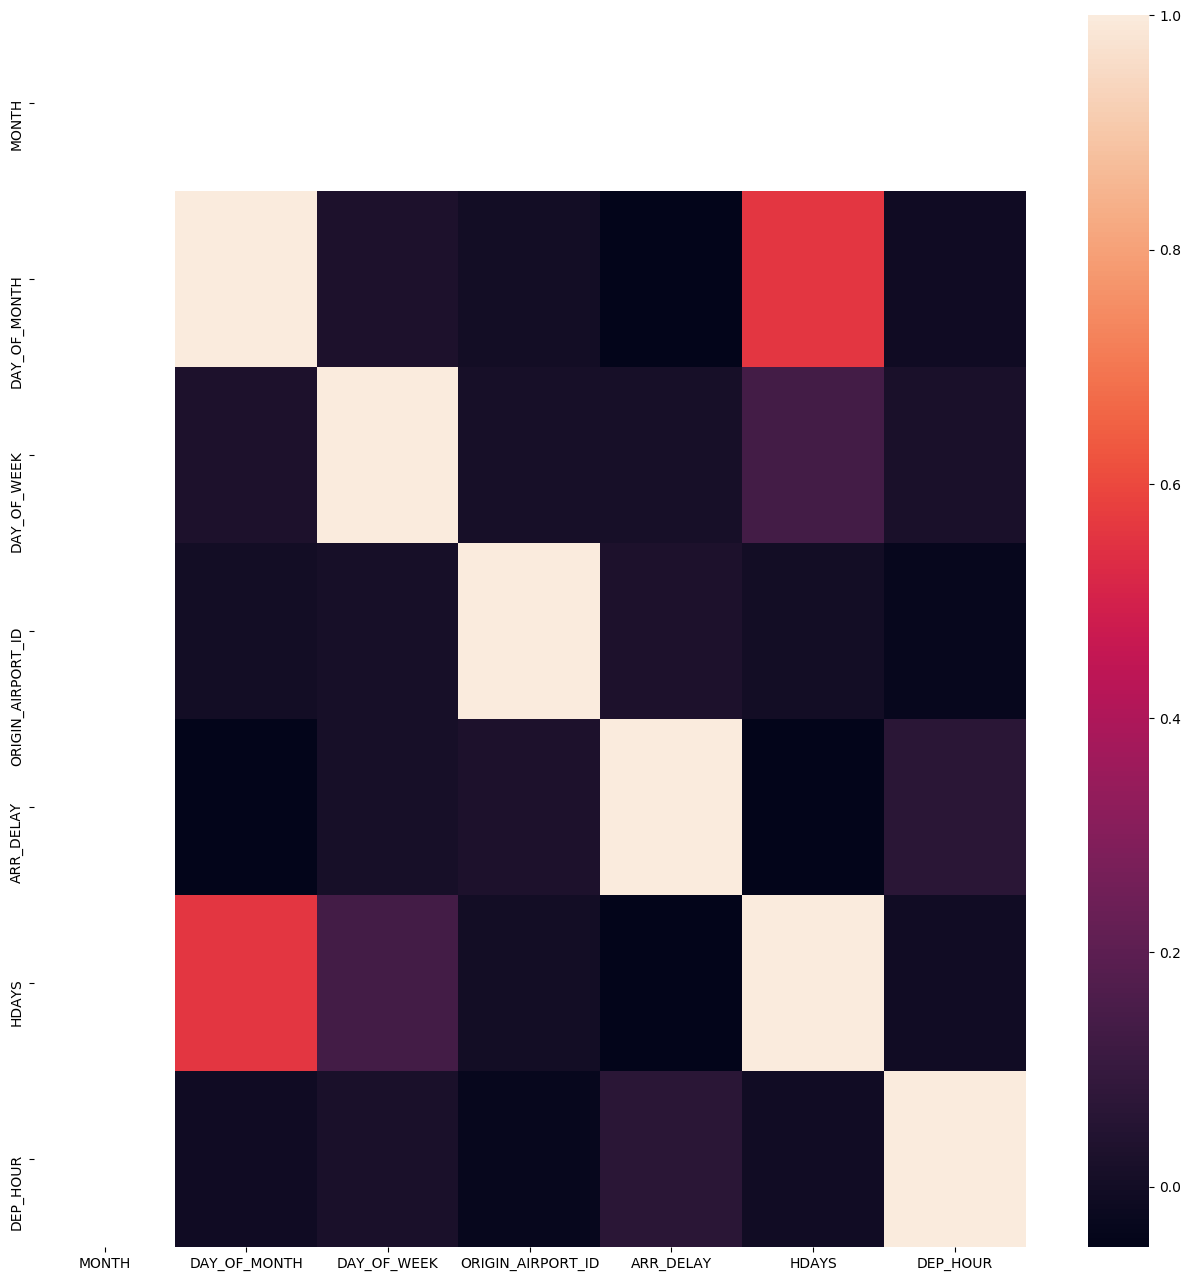

In [98]:
#Correlation Heat Map
plt.figure(figsize=(16, 16))
sns.heatmap(dataraw.corr())
plt.show()

## Quelques graphes

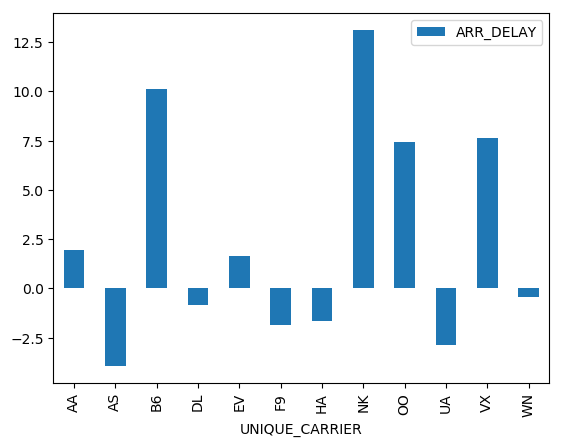

In [99]:
dfgroup = dataraw[['UNIQUE_CARRIER', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER']).mean()
dfgroup.plot.bar()

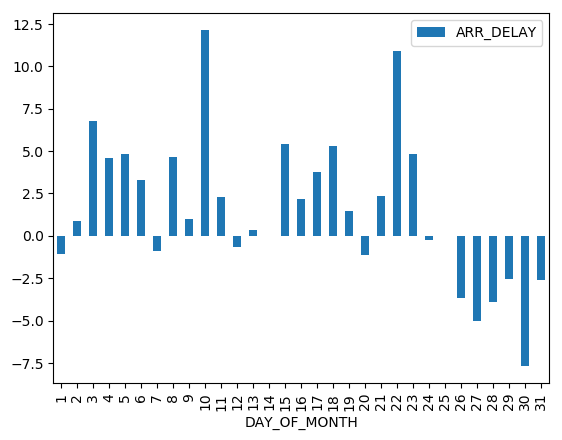

In [100]:
if 'DAY_OF_MONTH' in dataraw.columns:
    dfgroup = dataraw[['DAY_OF_MONTH', 'ARR_DELAY']].groupby(['DAY_OF_MONTH']).mean()
    dfgroup.plot.bar()

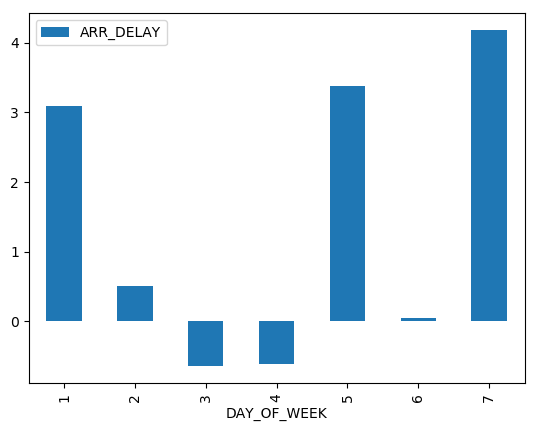

In [101]:
dfgroup = dataraw[['DAY_OF_WEEK', 'ARR_DELAY']].groupby(['DAY_OF_WEEK']).mean()
dfgroup.plot.bar()

In [102]:
if 'ARR_HOUR' in dataraw.columns:
    dfgroup = dataraw[['ARR_HOUR', 'ARR_DELAY']].groupby(['ARR_HOUR']).mean()
    dfgroup.plot.bar()

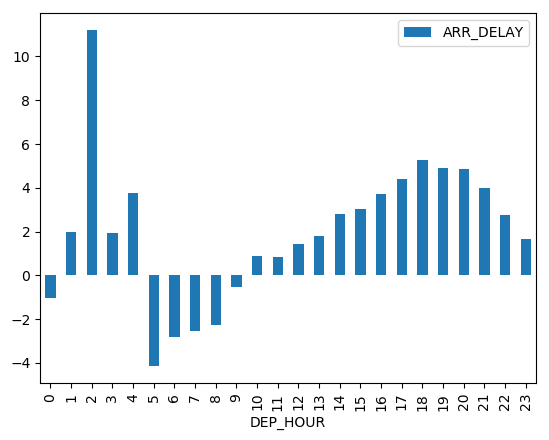

In [103]:
if 'DEP_HOUR' in dataraw.columns:
    dfgroup = dataraw[['DEP_HOUR', 'ARR_DELAY']].groupby(['DEP_HOUR']).mean()
    dfgroup.plot.bar()

## Exportation

In [104]:
dataraw.to_csv(CT_DIR_DATA + filename + '_ready.csv', sep="\t", encoding='utf-8', index=False)
dataraw.shape

(433298, 9)